In [570]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [571]:
def distance( m, n ):
    d =  math.sqrt( ( m[0] - n[0] ) ** 2  + ( m[1] - n[1] ) ** 2  )
    return d

In [572]:
def laplace( agents, r, l ):
    mat = np.zeros( ( l, l ) )
    for i in range( l ):
        cnt = 0
        for j in range( l ):
            if i != j and distance( agents[i], agents[j] ) <= r:
                mat[i][j] = 1
                cnt += 1
        print( cnt )
    for i in range( l ):
        mat[i][i] = -np.sum( mat[i] )
    return mat

In [573]:
def z_rec( Z, g, mat ):
    Z = Z + g * ( mat @ Z )
    return Z

In [574]:
def f_cal( Z, c ):
    f = np.sum( np.abs( Z - c ) )
    return f

In [575]:
def b_cal( mat, g ):
    b = mat + g**2 * np.dot( mat, mat )
    return b

In [576]:
agents = np.array( [[ 0, 0.5 ],
                    [ 0, 1 ],
                    [ -1.2, 1 ], 
                    [ 1.2, 1 ], 
                    [ -0.5, 1.5 ],
                    [ 0.5, 1.5 ],
                    [ -0.7, 2 ],
                    [ 0.5, 2 ],
                    [ 0, 2.2 ],
                    [ 0, 3 ]] )
l = len( agents )
c = np.round( np.mean( agents, axis = 0, dtype = np.float64 ), decimals=2 )
r = 1
mat = laplace( agents, r, l )
print( mat )

1
3
1
1
5
5
2
2
5
1
[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -3.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0. -5.  1.  1.  0.  1.  0.]
 [ 0.  1.  0.  1.  1. -5.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  1.  0. -2.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -2.  1.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1. -5.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.]]


[[ 0.   0.5]
 [ 0.   1. ]
 [-1.2  1. ]
 [ 1.2  1. ]
 [-0.5  1.5]
 [ 0.5  1.5]
 [-0.7  2. ]
 [ 0.5  2. ]
 [ 0.   2.2]
 [ 0.   3. ]]
[[ 0.   0.5]
 [ 0.   1. ]
 [-1.2  1. ]
 [ 1.2  1. ]
 [-0.5  1.5]
 [ 0.5  1.5]
 [-0.7  2. ]
 [ 0.5  2. ]
 [ 0.   2.2]
 [ 0.   3. ]]
[[ 0.   0.5]
 [ 0.   1. ]
 [-1.2  1. ]
 [ 1.2  1. ]
 [-0.5  1.5]
 [ 0.5  1.5]
 [-0.7  2. ]
 [ 0.5  2. ]
 [ 0.   2.2]
 [ 0.   3. ]]


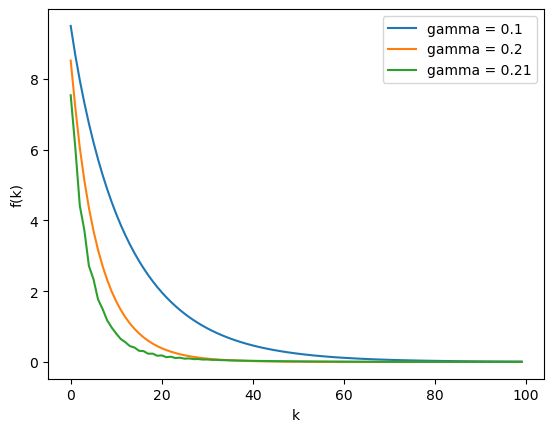

In [577]:
Z_1 = np.array( agents )
print( Z_1 )
g_1 = 0.1
p_1 = []
for k in range(100):
    Z_1 = z_rec( Z_1, g_1, mat )
    p_1.append( f_cal( Z_1, c ) )
Z_2 = np.array( agents )
print( Z_2 )
g_2 = 0.2
p_2 = []
for k in range(100):
    Z_2 = z_rec( Z_2, g_2, mat )
    p_2.append( f_cal( Z_2, c ) )
Z_3 = np.array( agents )
print( Z_3 )
g_3 = 0.3
p_3 = []
for k in range(100):
    Z_3 = z_rec( Z_3, g_3, mat )
    p_3.append( f_cal( Z_3, c ) )
    
iter = range( 0, 100 )
plt.plot( iter, p_1, label = 'gamma = 0.1', linestyle = '-' )
plt.plot( iter, p_2, label = 'gamma = 0.2', linestyle = '-' )
plt.plot( iter, p_3, label = 'gamma = 0.21', linestyle = '-' )

plt.xlabel( 'k' )
plt.ylabel( 'f(k)' )
plt.legend()
plt.show()